**ENTENDIMENTO DO PROBLEMA - Ataque Cardiáco em Jovens e Adultos da África do Sul**

O dataset abaixo foi retirado da plataforma Kaggle, pode ser encontrado no seguinte link: [Heart Attack in Youth vs Adult in South Africa Dataset](https://www.kaggle.com/datasets/ashaychoudhary/heart-attack-in-youth-vs-adult-in-south-africa/data).

Ele contém fatores de risco de ataque cardíaco relacionados à indivíduos da África do Sul. Inclui detalhes demográficos, histórico médico, hábitos de estilo de vida e medidas clínicas para avaliar resultados de ataque cardíaco. 

O conjunto de dados é projetado para modelagem preditiva, análise estatística e aplicações de aprendizado de máquina em pesquisa de saúde.

In [220]:
#importando pacotes:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
from scipy.stats import ks_2samp

| **Nome**                               | **Explicação**                                                                                  |
|----------------------------------------|------------------------------------------------------------------------------------------------|
| **Patient_ID**                         | Identificador único do paciente.                                                                |
| **Age**                                | Idade do paciente em anos.                                                                      |
| **Gender**                             | Gênero do paciente: Masculino ou Feminino.                                                       |
| **Cholesterol_Level**                  | Nível de colesterol total no sangue, medido em miligramas por decilitro (mg/dL).                |
| **Blood_Pressure_Systolic**            | Pressão arterial sistólica do paciente, medida em milímetros de mercúrio (mmHg).                |
| **Blood_Pressure_Diastolic**           | Pressão arterial diastólica do paciente, medida em milímetros de mercúrio (mmHg).               |
| **Smoking_Status**                     | Status de tabagismo do paciente: Fumante (Sim) ou Não Fumante (Não).                            |
| **Alcohol_Intake**                     | Nível de consumo de álcool: Baixo, Moderado ou Alto.                                            |
| **Physical_Activity**                  | Nível de atividade física do paciente: Sedentário, Ativo ou Altamente Ativo.                    |
| **Obesity_Index**                      | Índice de Massa Corporal (IMC), que é uma medida de obesidade calculada a partir do peso e altura. |
| **Diabetes_Status**                    | Status de diabetes do paciente: Tem diabetes (Sim) ou Não tem diabetes (Não).                    |
| **Family_History_Heart_Disease**       | Histórico familiar de doenças cardíacas: Sim (se houver histórico) ou Não (se não houver).     |
| **Diet_Quality**                       | Qualidade da dieta do paciente: Ruim, Média ou Boa.                                              |
| **Stress_Level**                       | Nível de estresse do paciente: Baixo, Médio ou Alto.                                            |
| **Heart_Attack_History**               | Histórico de infarto do miocárdio: Já teve infarto (Sim) ou Nunca teve (Não).                   |
| **Medication_Usage**                   | Uso de medicação pelo paciente: Sim (usa medicação) ou Não (não usa medicação).                 |
| **Triglycerides_Level**                | Nível de triglicerídeos no sangue, medido em miligramas por decilitro (mg/dL).                  |
| **LDL_Level**                          | Nível de LDL (lipoproteína de baixa densidade), conhecido como "colesterol ruim" (mg/dL).      |
| **HDL_Level**                          | Nível de HDL (lipoproteína de alta densidade), conhecido como "colesterol bom" (mg/dL).        |
| **Heart_Attack_Outcome**               | Resultado de um ataque cardíaco: 0 (Não) ou 1 (Sim), indicando se o paciente sofreu um infarto. |


In [222]:
df=pd.read_csv('heart_attack_south_africa.csv')
df.head()

,Patient_ID,Age,Gender,Cholesterol_Level,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Smoking_Status,Alcohol_Intake,Physical_Activity,Obesity_Index,Diabetes_Status,Family_History_Heart_Disease,Diet_Quality,Stress_Level,Heart_Attack_History,Medication_Usage,Triglycerides_Level,LDL_Level,HDL_Level,Heart_Attack_Outcome
0,1,76,Female,156,94,79,No,High,Sedentary,35.2,No,No,Good,High,No,No,264,141,65,0
1,2,39,Female,160,185,88,No,Low,Sedentary,21.3,No,No,Average,Medium,No,Yes,150,81,42,0
2,3,85,Male,254,173,113,Yes,Moderate,Highly Active,32.0,Yes,No,Good,Low,No,No,220,124,70,1
3,4,45,Female,261,187,65,No,High,Sedentary,36.4,No,Yes,Average,Low,No,Yes,141,56,38,1
4,5,48,Male,206,189,84,No,Low,Active,26.6,No,No,Good,High,No,No,221,186,26,0


Como temos uma variável categórica, vamos analisar o balanceamento:

In [224]:
df['Heart_Attack_Outcome'].value_counts()

Heart_Attack_Outcome
1    58732
0    41268
Name: count, dtype: int64

Não temos aqui um problema de balanceamento, até que as categorias estão bem equilibradas.

In [226]:
df.describe()

,Patient_ID,Age,Cholesterol_Level,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Obesity_Index,Triglycerides_Level,LDL_Level,HDL_Level,Heart_Attack_Outcome
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,56.929210,224.578740,144.317750,89.591950,29.004788,174.629860,124.333400,49.547090,0.587320
std,28867.657797,18.776713,43.316257,31.759636,17.277238,6.343317,72.118654,43.340624,17.350927,0.492319
min,1.000000,25.000000,150.000000,90.000000,60.000000,18.000000,50.000000,50.000000,20.000000,0.000000
25%,25000.750000,41.000000,187.000000,117.000000,75.000000,23.500000,112.000000,87.000000,35.000000,0.000000
50%,50000.500000,57.000000,225.000000,144.000000,90.000000,29.000000,175.000000,124.000000,50.000000,1.000000
75%,75000.250000,73.000000,262.000000,172.000000,105.000000,34.500000,237.000000,162.000000,65.000000,1.000000
max,100000.000000,89.000000,299.000000,199.000000,119.000000,40.000000,299.000000,199.000000,79.000000,1.000000


Através da análise descritiva acima, podemos observar que:  

- **Ausência de dados faltantes:** Todas as variáveis têm a mesma quantidade de amostras (100.000), indicando que não há valores ausentes no dataset.  

- **Idade:** A média de idade dos pacientes é **56,9 anos**, sendo que **25% têm 41 anos ou menos** e **25% têm 73 anos ou mais**, indicando uma amostra com predominância de adultos e idosos.  

- **Pressão Arterial:**  
  - **Sistólica:** Média de **144,3 mmHg**, acima do ideal (<120 mmHg).  
  - **Diastólica:** Média de **89,6 mmHg**, superior ao recomendado (<80 mmHg).  
  - **25% da amostra tem pressão sistólica maior que 172 mmHg**, sugerindo prevalência de hipertensão.  

- **Colesterol:** O nível médio é **224,6 mg/dL**, acima do recomendado (<190 mg/dL), com **75% dos pacientes acima de 187 mg/dL**.  

- **Índice de Massa Corporal (IMC):** A média é **29,0**, acima do ideal (18,5 - 24,9), sugerindo uma predominância de sobrepeso/obesidade na amostra.  

- **Triglicerídeos:** Média de **174,6 mg/dL** (ideal: <150 mg/dL), com **25% dos pacientes acima de 237 mg/dL**, indicando um fator de risco significativo.  

- **LDL (Colesterol Ruim):** Média de **124,3 mg/dL**, dentro do limite máximo (130 mg/dL), mas **25% da amostra ultrapassa 162 mg/dL**.  

- **HDL (Colesterol Bom):** Média de **49,5 mg/dL**, acima do mínimo recomendado (>40 mg/dL), o que pode ser um fator protetor.  

- **Ocorrência de Infarto:** **58,7% da amostra já sofreu um infarto**, sugerindo um grupo de alto risco cardiovascular.  

Os dados indicam um perfil de pacientes com **fatores de risco significativos para doenças cardiovasculares**, como **hipertensão, colesterol elevado, obesidade e triglicerídeos altos**.  



### Analise Univariada:

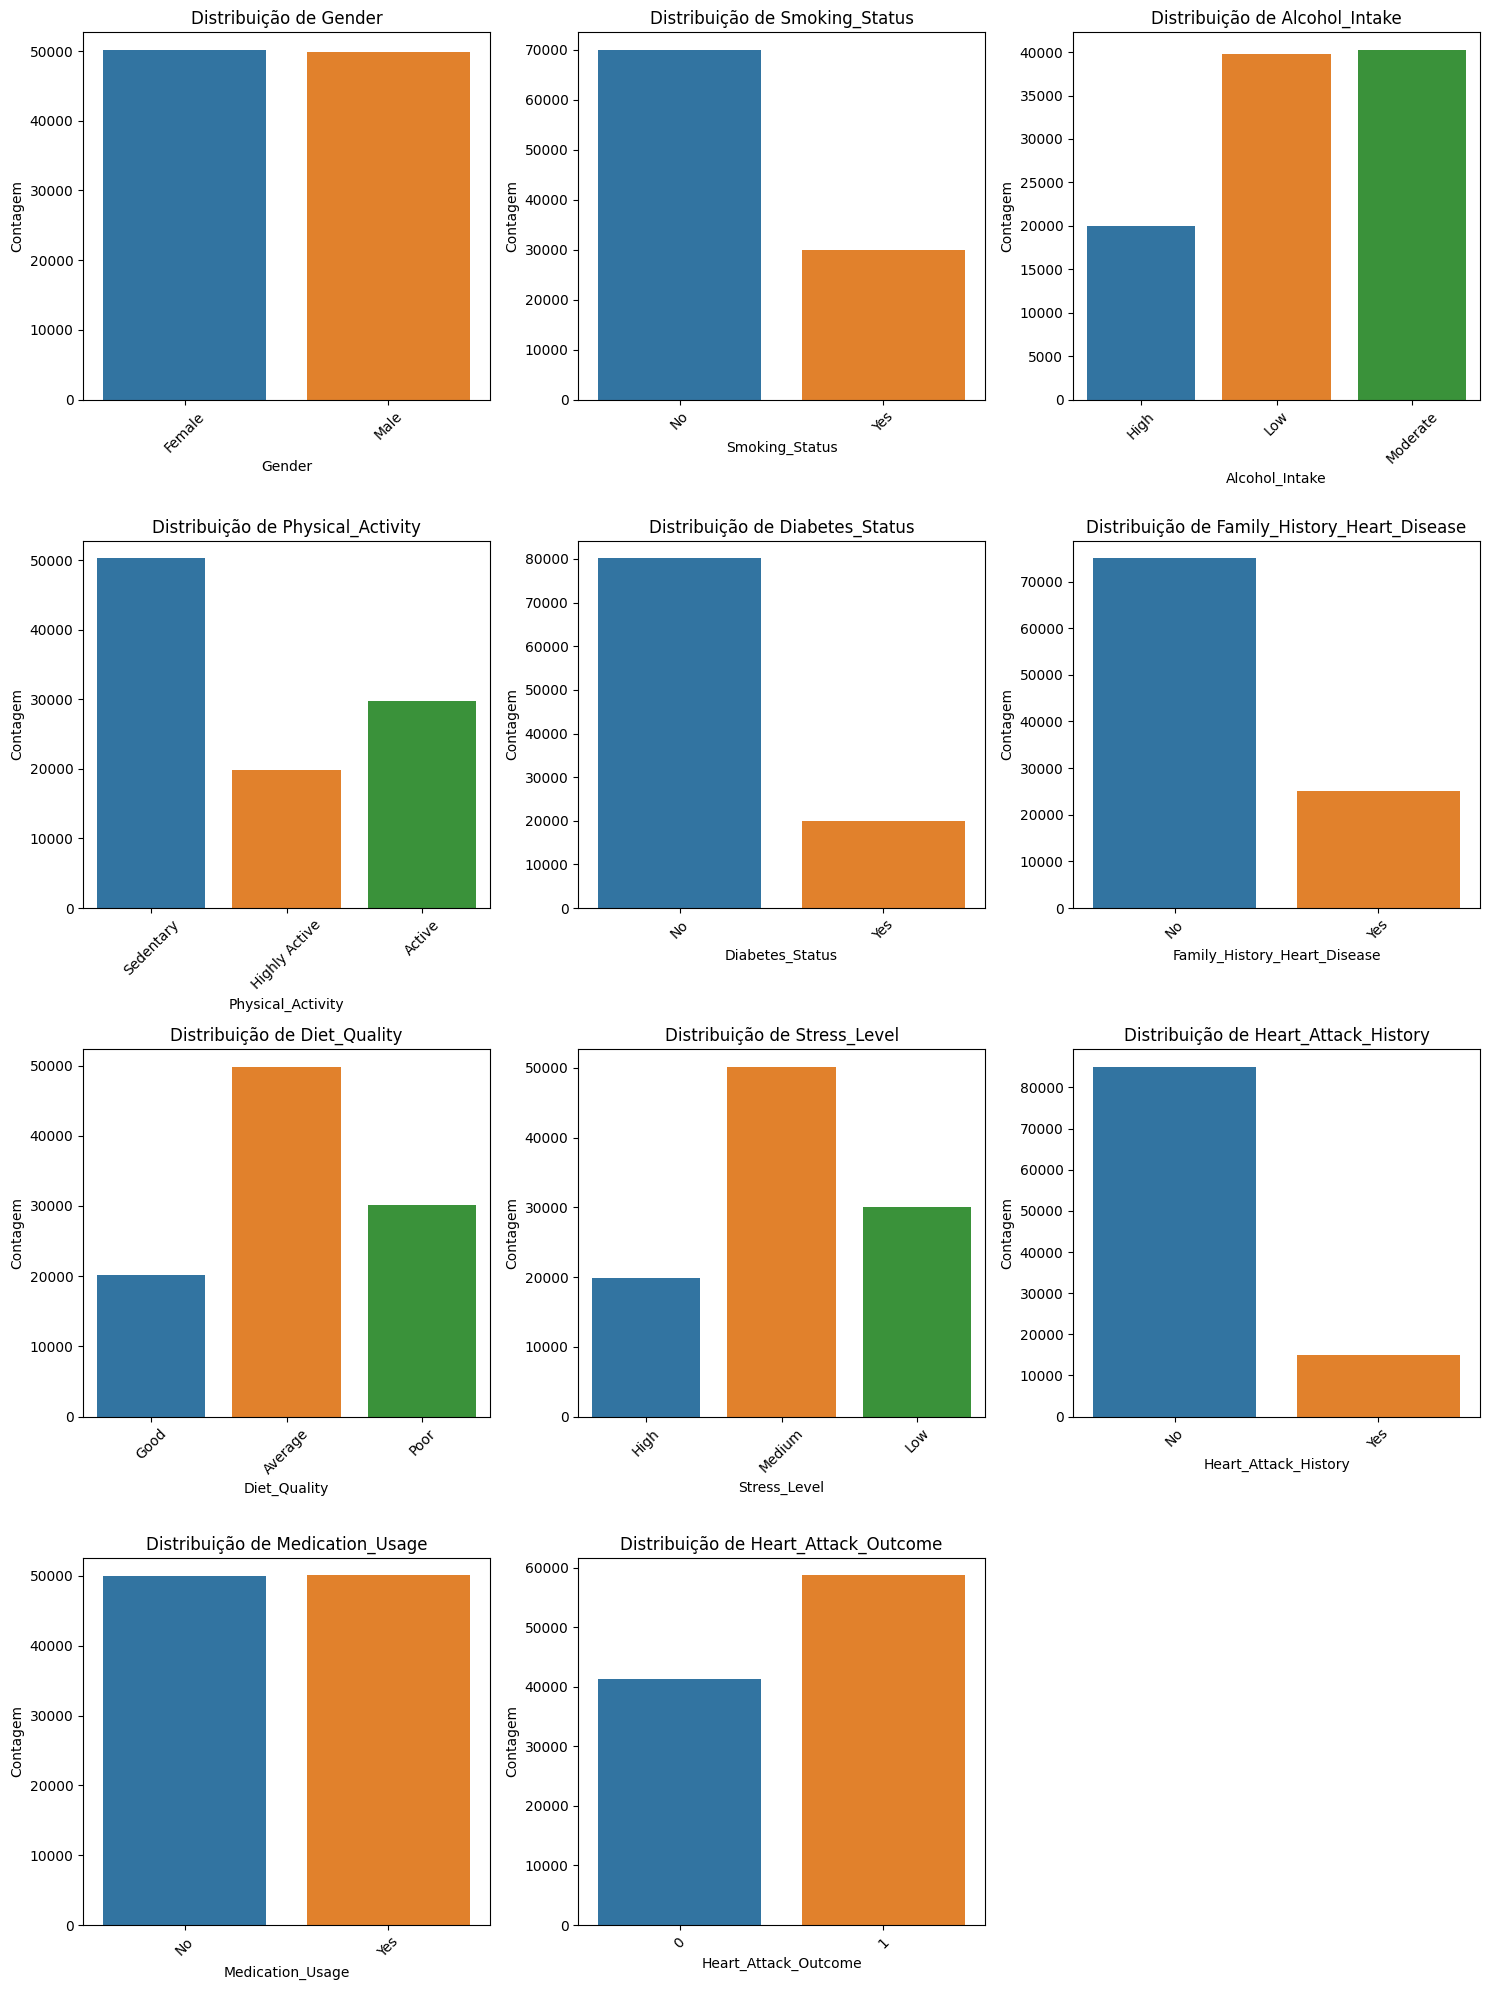

In [229]:
def grafico_count_todas(df, limite_categorico=10):
    colunas_categoricas = [col for col in df.columns if df[col].nunique() <= limite_categorico]

    total = len(colunas_categoricas)
    linhas = (total // 3) + (total % 3 > 0)
    plt.figure(figsize=(15, 5 * linhas))

    for i, col in enumerate(colunas_categoricas, 1):
        plt.subplot(linhas, 3, i)
        sns.countplot(data=df, x=col, hue=col, legend=False)
        plt.title(f'Distribuição de {col}')
        plt.xlabel(col)
        plt.ylabel('Contagem')
        plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

grafico_count_todas(df)

### Analise Bivariada:

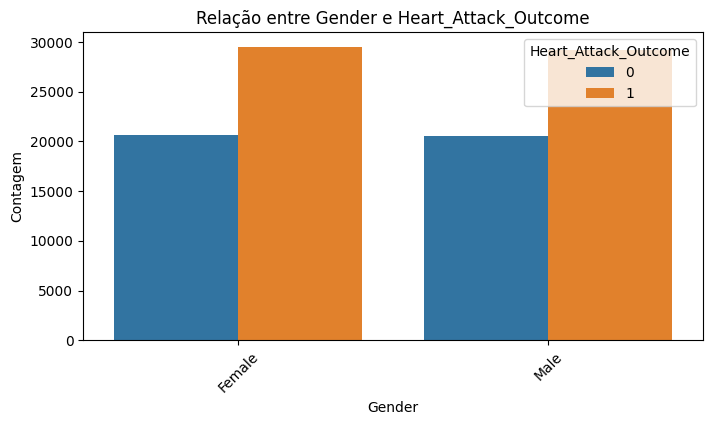

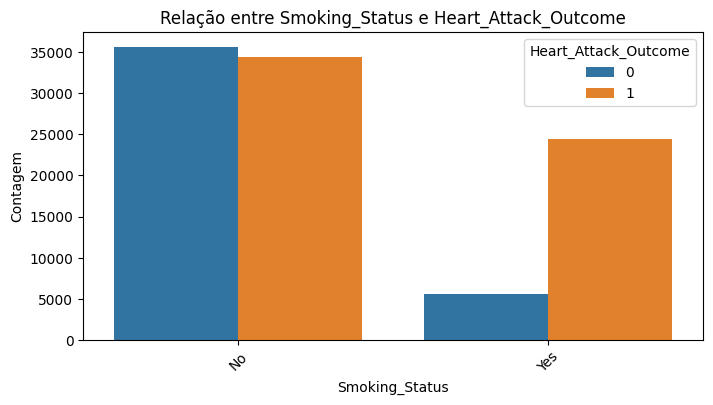

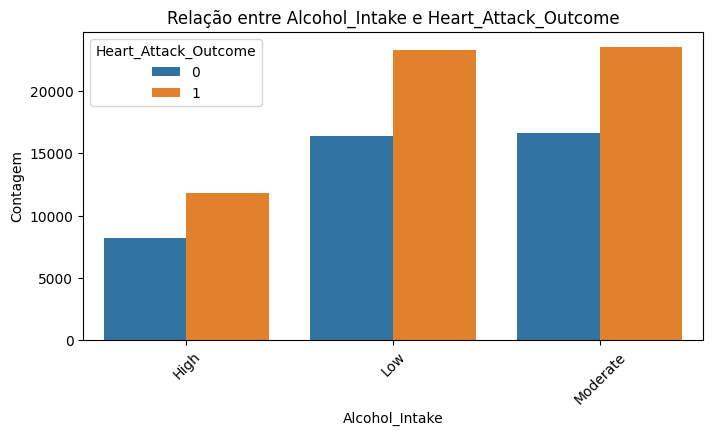

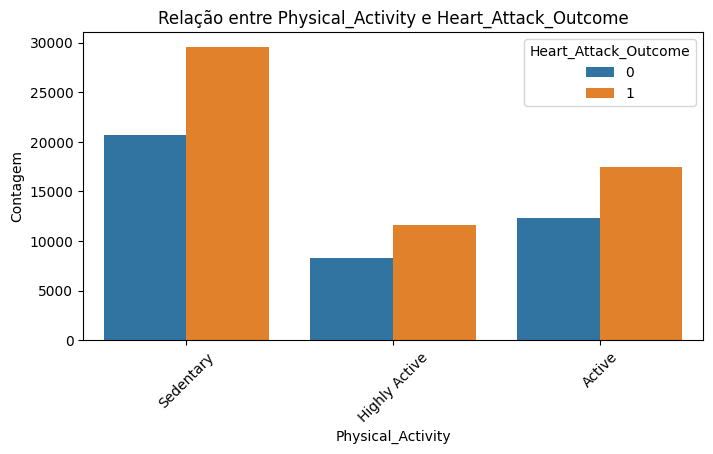

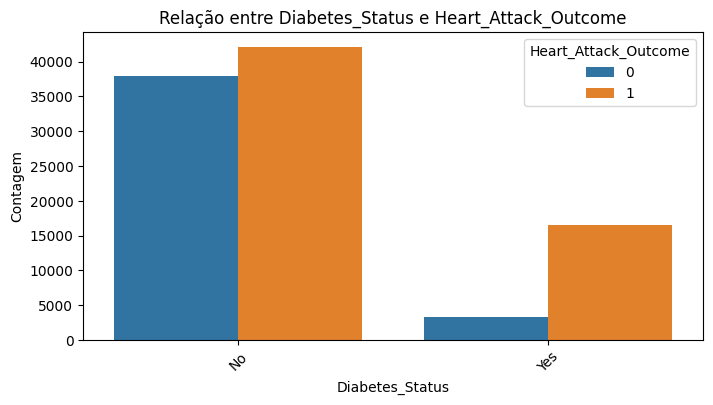

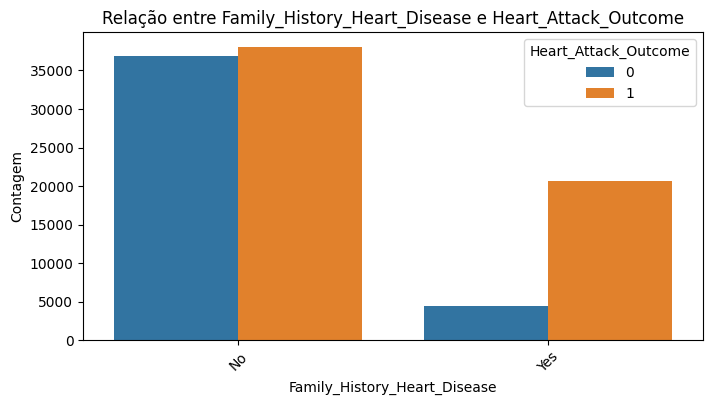

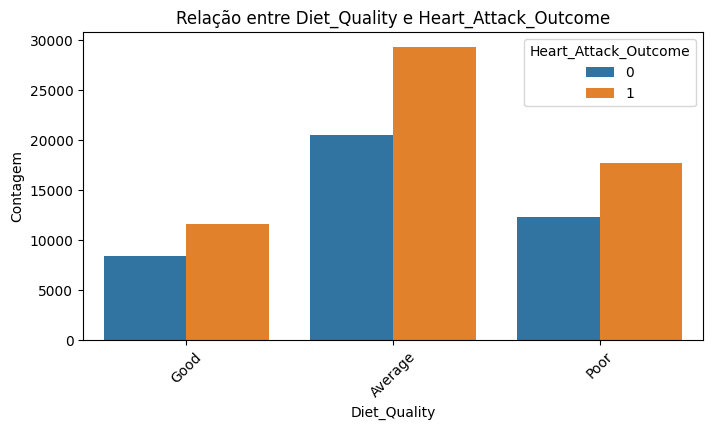

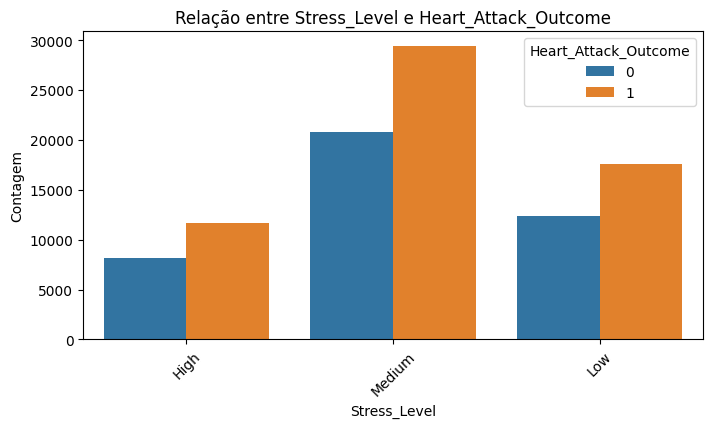

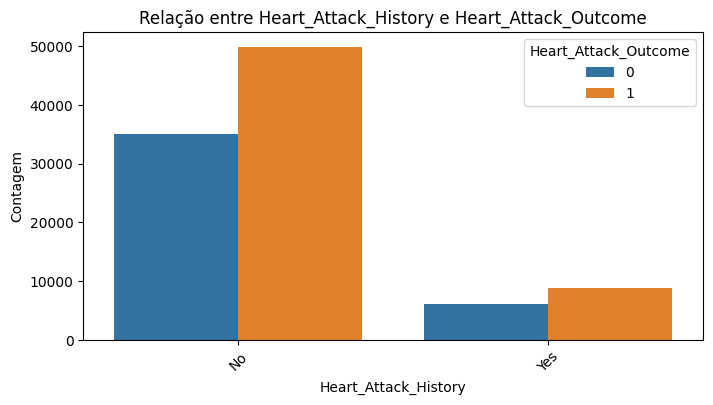

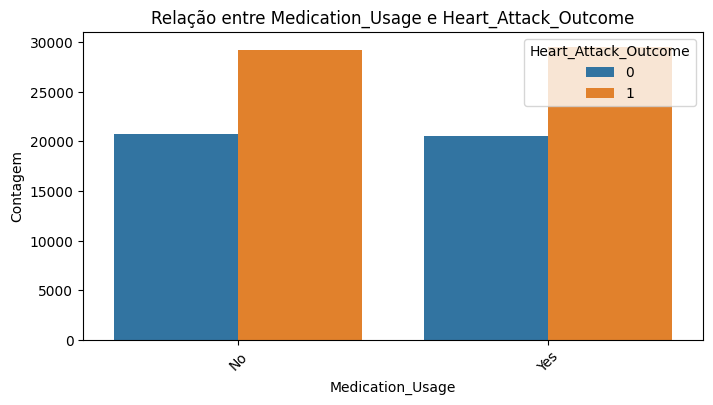

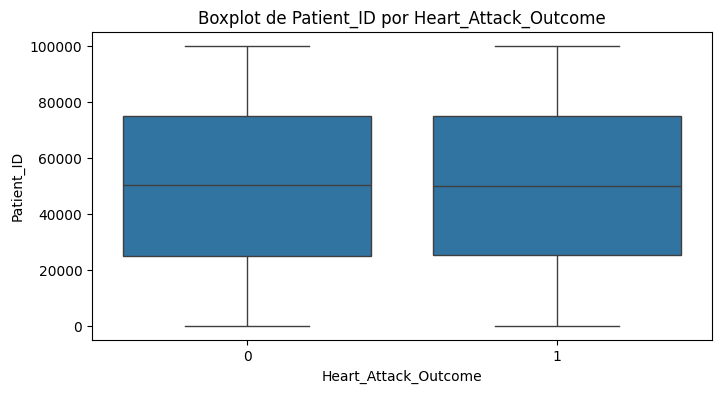

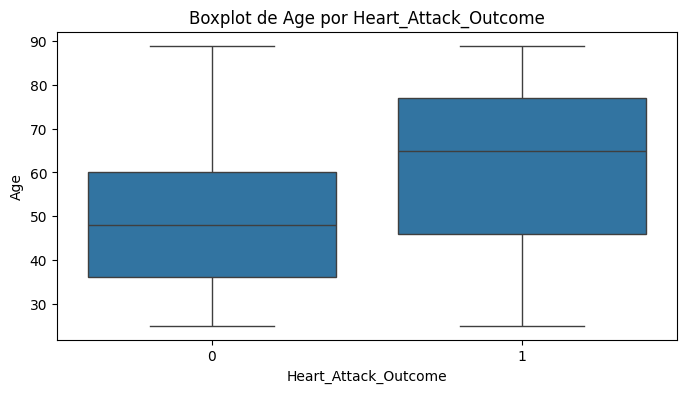

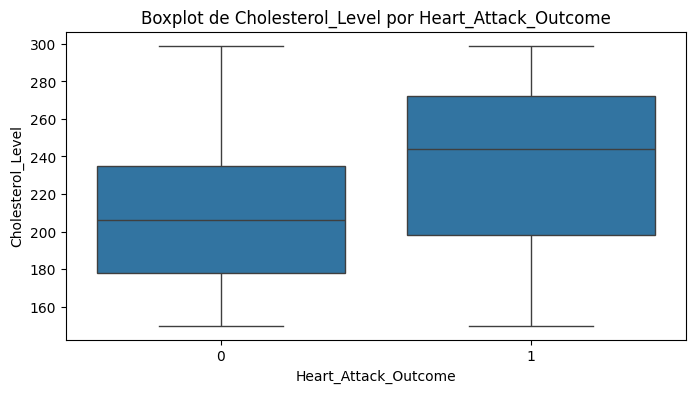

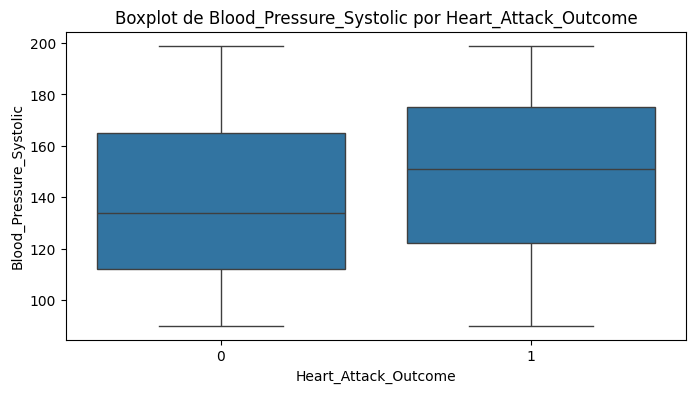

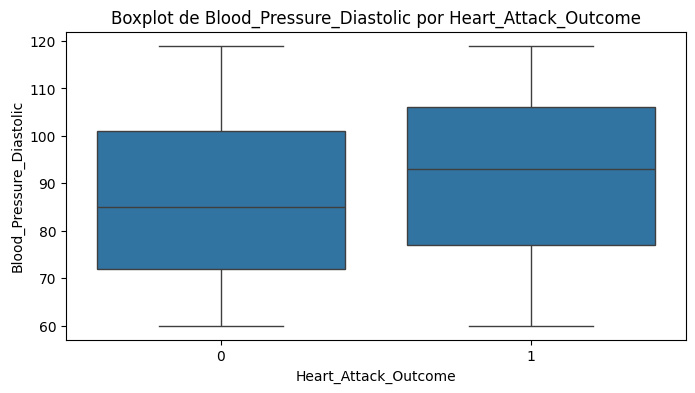

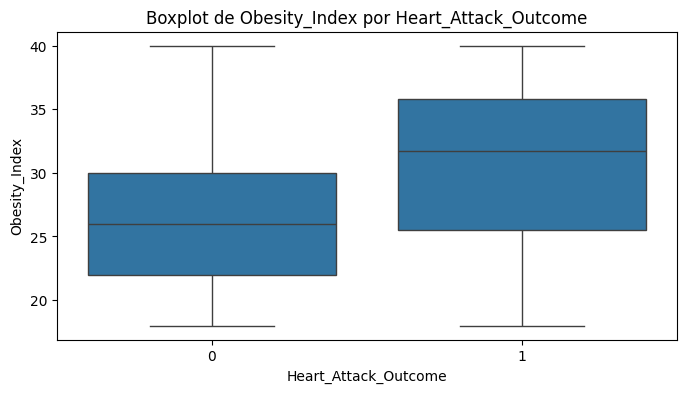

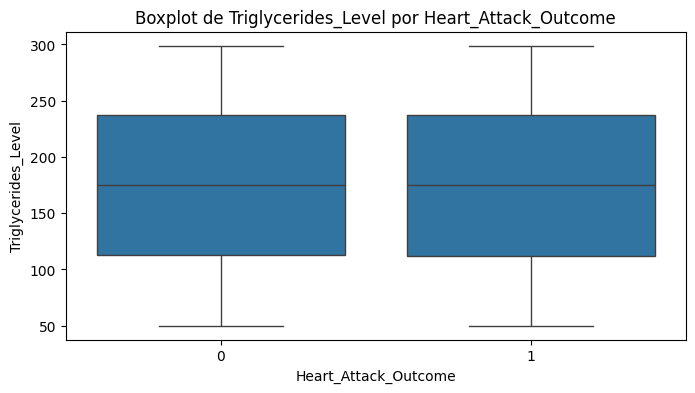

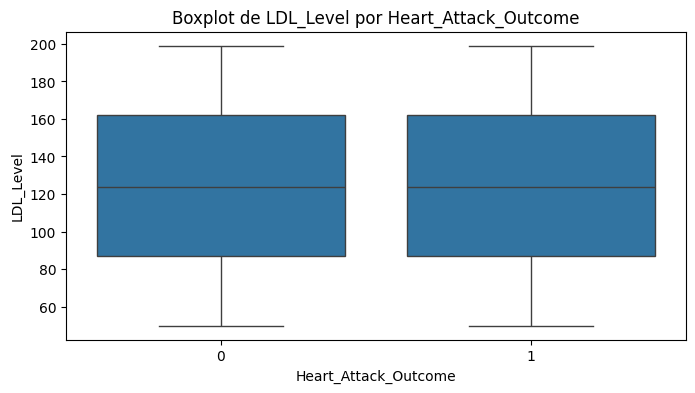

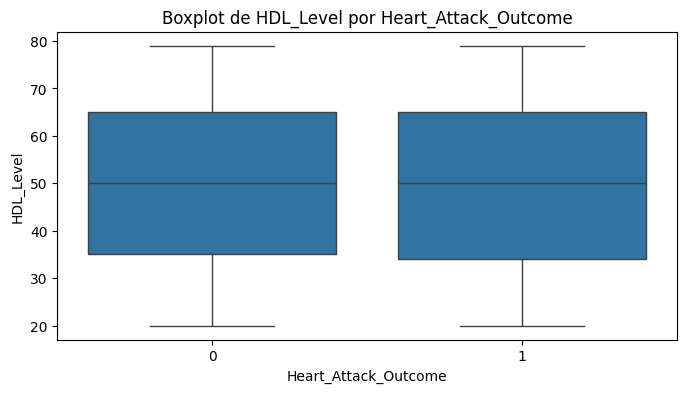

In [231]:
def analise_bivariada(df, target='Heart_Attack_Outcome', limite_categorico=10):
    
    colunas_categoricas = [col for col in df.columns if df[col].nunique() <= limite_categorico and col != target]
    colunas_numericas = [col for col in df.select_dtypes(include=['int64', 'float64']).columns if col not in colunas_categoricas and col != target]

    # Criar gráficos para variáveis categóricas
    for col in colunas_categoricas:
        plt.figure(figsize=(8, 4))
        sns.countplot(data=df, x=col, hue=target)
        plt.title(f'Relação entre {col} e {target}')
        plt.xlabel(col)
        plt.ylabel('Contagem')
        plt.legend(title=target)
        plt.xticks(rotation=45)
        plt.show()
    
    # Criar gráficos para variáveis numéricas
    for col in colunas_numericas:
        plt.figure(figsize=(8, 4))
        sns.boxplot(data=df, x=target, y=col)
        plt.title(f'Boxplot de {col} por {target}')
        plt.xlabel(target)
        plt.ylabel(col)
        plt.show()

analise_bivariada(df)


Veificação de nulos:

In [233]:
df.isna().sum()

Patient_ID                      0
Age                             0
Gender                          0
Cholesterol_Level               0
Blood_Pressure_Systolic         0
Blood_Pressure_Diastolic        0
Smoking_Status                  0
Alcohol_Intake                  0
Physical_Activity               0
Obesity_Index                   0
Diabetes_Status                 0
Family_History_Heart_Disease    0
Diet_Quality                    0
Stress_Level                    0
Heart_Attack_History            0
Medication_Usage                0
Triglycerides_Level             0
LDL_Level                       0
HDL_Level                       0
Heart_Attack_Outcome            0
dtype: int64

Verificação de duplicados:

In [235]:
# Verificar duplicatas
duplicates = df[df.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [Patient_ID, Age, Gender, Cholesterol_Level, Blood_Pressure_Systolic, Blood_Pressure_Diastolic, Smoking_Status, Alcohol_Intake, Physical_Activity, Obesity_Index, Diabetes_Status, Family_History_Heart_Disease, Diet_Quality, Stress_Level, Heart_Attack_History, Medication_Usage, Triglycerides_Level, LDL_Level, HDL_Level, Heart_Attack_Outcome]
Index: []


verificação dos tipos de dados:

In [237]:
df.dtypes

Patient_ID                        int64
Age                               int64
Gender                           object
Cholesterol_Level                 int64
Blood_Pressure_Systolic           int64
Blood_Pressure_Diastolic          int64
Smoking_Status                   object
Alcohol_Intake                   object
Physical_Activity                object
Obesity_Index                   float64
Diabetes_Status                  object
Family_History_Heart_Disease     object
Diet_Quality                     object
Stress_Level                     object
Heart_Attack_History             object
Medication_Usage                 object
Triglycerides_Level               int64
LDL_Level                         int64
HDL_Level                         int64
Heart_Attack_Outcome              int64
dtype: object

Vamos verificar os valores unicos para cada variável do tipo object e substituir para numérico, pois assim facilitará a nossa análise.

In [239]:
#célula utilizada para verificar todos os unique:
df['Family_History_Heart_Disease'].unique()

array(['No', 'Yes'], dtype=object)

Substituição dos unique para numéricos. 

Aqui seguiremos um padrão: 
- 0: homem, low e no.
- 1: famele, moderado/médio e yes.
- 2: high, good.

In [241]:
# Conversão: Masculino -> 0, Feminino -> 1
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

# Conversão: Fumante -> 1, Não Fumante -> 0
df['Smoking_Status'] = df['Smoking_Status'].map({'Yes': 1, 'No': 0})

# Conversão: low -> 0, Moderate -> 1, high -> 2
df['Alcohol_Intake'] = df['Alcohol_Intake'].map({'Low': 0, 'Moderate': 1, 'High': 2})

# Conversão: Sedentary -> 0, Active -> 1, Highly Active -> 2
df['Physical_Activity'] = df['Physical_Activity'].map({'Sedentary': 0, 'Active': 1, 'Highly Active': 2})

# Conversão: no -> 0, yes -> 1
df['Diabetes_Status'] = df['Diabetes_Status'].map({'No': 0, 'Yes': 1})

# Conversão: no -> 0, yes -> 1
df['Family_History_Heart_Disease'] = df['Family_History_Heart_Disease'].map({'No': 0, 'Yes': 1})

# Conversão: Good -> 0, Average -> 1, Poor -> 2
df['Diet_Quality'] = df['Diet_Quality'].map({'Poor': 0, 'Average': 1, 'Good': 2})

# Conversão: Good -> 0, Average -> 1, Poor -> 2
df['Stress_Level'] = df['Stress_Level'].map({'Low': 0, 'Medium': 1, 'High': 2})

# Conversão: no -> 0, yes -> 1
df['Heart_Attack_History'] = df['Heart_Attack_History'].map({'No': 0, 'Yes': 1})

# Conversão: no -> 0, yes -> 1
df['Medication_Usage'] = df['Medication_Usage'].map({'No': 0, 'Yes': 1})

# Exibir o DataFrame
df.head()

,Patient_ID,Age,Gender,Cholesterol_Level,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Smoking_Status,Alcohol_Intake,Physical_Activity,Obesity_Index,Diabetes_Status,Family_History_Heart_Disease,Diet_Quality,Stress_Level,Heart_Attack_History,Medication_Usage,Triglycerides_Level,LDL_Level,HDL_Level,Heart_Attack_Outcome
0,1,76,1,156,94,79,0,2,0,35.2,0,0,2,2,0,0,264,141,65,0
1,2,39,1,160,185,88,0,0,0,21.3,0,0,1,1,0,1,150,81,42,0
2,3,85,0,254,173,113,1,1,2,32.0,1,0,2,0,0,0,220,124,70,1
3,4,45,1,261,187,65,0,2,0,36.4,0,1,1,0,0,1,141,56,38,1
4,5,48,0,206,189,84,0,0,1,26.6,0,0,2,2,0,0,221,186,26,0


Verificação novamente dos tipos:

In [243]:
df.dtypes

Patient_ID                        int64
Age                               int64
Gender                            int64
Cholesterol_Level                 int64
Blood_Pressure_Systolic           int64
Blood_Pressure_Diastolic          int64
Smoking_Status                    int64
Alcohol_Intake                    int64
Physical_Activity                 int64
Obesity_Index                   float64
Diabetes_Status                   int64
Family_History_Heart_Disease      int64
Diet_Quality                      int64
Stress_Level                      int64
Heart_Attack_History              int64
Medication_Usage                  int64
Triglycerides_Level               int64
LDL_Level                         int64
HDL_Level                         int64
Heart_Attack_Outcome              int64
dtype: object

Podemos deletar a variável que traz o ID do paciente, pois essa não tem poder preditivo:

In [245]:
df.drop('Patient_ID', axis=1, inplace=True)

Agora todas as nossas variáveis são numéricas. A seguir, exibiremos a matriz de correlação:

In [247]:
# Calcular a correlação entre as variáveis numéricas
correlation_matrix = df.corr()

# Exibir a matriz de correlaçãO
correlation_matrix

,Age,Gender,Cholesterol_Level,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Smoking_Status,Alcohol_Intake,Physical_Activity,Obesity_Index,Diabetes_Status,Family_History_Heart_Disease,Diet_Quality,Stress_Level,Heart_Attack_History,Medication_Usage,Triglycerides_Level,LDL_Level,HDL_Level,Heart_Attack_Outcome
Age,1.000000,-0.000265,-0.000364,3.672133e-03,-0.001093,-0.001992,0.001440,0.001244,-0.001118,0.004342,0.001038,-0.003163,0.000031,0.001438,-0.000674,0.001992,0.001466,-1.978825e-03,0.298683
Gender,-0.000265,1.000000,0.001288,1.561311e-03,-0.000438,0.003381,0.000312,-0.002084,0.001526,0.001644,0.002607,-0.001768,-0.000681,0.001375,0.003214,0.001929,0.001228,-3.194075e-03,0.001068
Cholesterol_Level,-0.000364,0.001288,1.000000,-1.240133e-03,0.005179,-0.002368,-0.001211,0.001546,-0.000109,-0.002158,0.002946,0.001665,0.000613,0.000608,0.002553,0.001935,-0.000127,-2.933691e-03,0.283860
Blood_Pressure_Systolic,0.003672,0.001561,-0.001240,1.000000e+00,-0.001568,-0.002310,0.003378,-0.002232,-0.003730,-0.005901,0.002520,0.003930,0.004228,0.001777,-0.000756,-0.002962,0.006897,2.398179e-07,0.148573
Blood_Pressure_Diastolic,-0.001093,-0.000438,0.005179,-1.568419e-03,1.000000,-0.004257,0.005108,0.000542,0.000561,0.001538,-0.002827,0.001993,0.001304,-0.002254,-0.002920,-0.002711,0.003907,-4.343218e-03,0.140187
Smoking_Status,-0.001992,0.003381,-0.002368,-2.310456e-03,-0.004257,1.000000,0.001635,-0.000382,0.001438,-0.005344,0.001176,-0.004938,0.003301,0.004479,0.002653,-0.003851,-0.006849,-3.216452e-03,0.299025
Alcohol_Intake,0.001440,0.000312,-0.001211,3.378105e-03,0.005108,0.001635,1.000000,-0.008435,-0.001012,-0.000856,0.004792,0.004153,0.003549,-0.002913,-0.001027,-0.000683,-0.001957,6.176661e-04,0.001807
Physical_Activity,0.001244,-0.002084,0.001546,-2.231550e-03,0.000542,-0.000382,-0.008435,1.000000,-0.005184,0.001957,-0.002898,-0.003948,-0.002988,-0.000035,0.004533,0.004236,0.001114,-6.733984e-04,-0.002991
Obesity_Index,-0.001118,0.001526,-0.000109,-3.730381e-03,0.000561,0.001438,-0.001012,-0.005184,1.000000,0.003364,-0.003225,-0.004027,0.000901,-0.002214,0.004341,0.002233,0.004995,-1.010832e-03,0.296385
Diabetes_Status,0.004342,0.001644,-0.002158,-5.901092e-03,0.001538,-0.005344,-0.000856,0.001957,0.003364,1.000000,0.000127,-0.003171,-0.005465,0.001884,-0.002617,-0.002845,-0.003741,2.976827e-04,0.250756


A tabela acima está um pouco extensa, por isso, iremos plotar um gráfico que também traz essa correlação e nos permite verificar melhor:

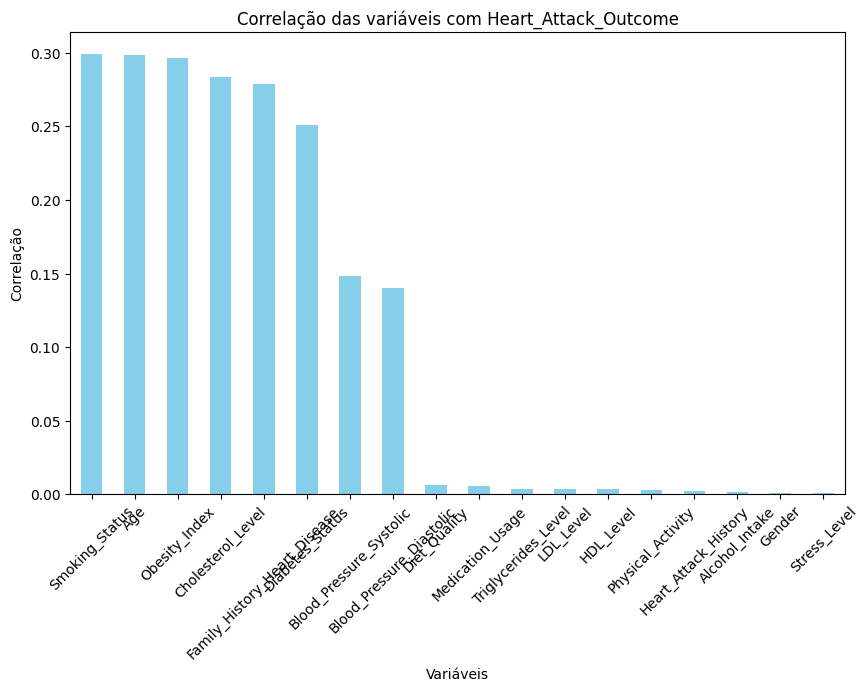

In [249]:
# Calcular a correlação de todas as variáveis com 'Heart_Attack_Outcome'
correlation_with_heart_attack = df.corr()['Heart_Attack_Outcome'].drop('Heart_Attack_Outcome')

# Ordenar as correlações de forma decrescente
sorted_correlation = correlation_with_heart_attack.abs().sort_values(ascending=False)

# Plotar um gráfico de barras das variáveis com maior correlação
plt.figure(figsize=(10, 6))
sorted_correlation.plot(kind='bar', color='skyblue')
plt.title('Correlação das variáveis com Heart_Attack_Outcome')
plt.xlabel('Variáveis')
plt.ylabel('Correlação')
plt.xticks(rotation=45)
plt.show()


De acordo com o gráfico acima, temos como maiores correlação com a nossa target as seguintes variáveis:
- Age → 0.2987 (correlação positiva)
- Smoking_Status → 0.2990 (correlação positiva)
- Cholesterol_Level → 0.2839 (correlação positiva)
- Obesity_Index → 0.2964 (correlação positiva)
- Diabetes_Status → 0.2508 (correlação positiva)
- Family_History_Heart_Disease → 0.2789 (correlação positiva)
- Blood_Pressure_Systolic → 0.1486 (correlação positiva)
- Blood_Pressure_Diastolic → 0.1402 (correlação positiva)

A seguir, vamos plotar o heatmap da nossa matriz de correlação para identificar possíveis casos de multicolineariedade:

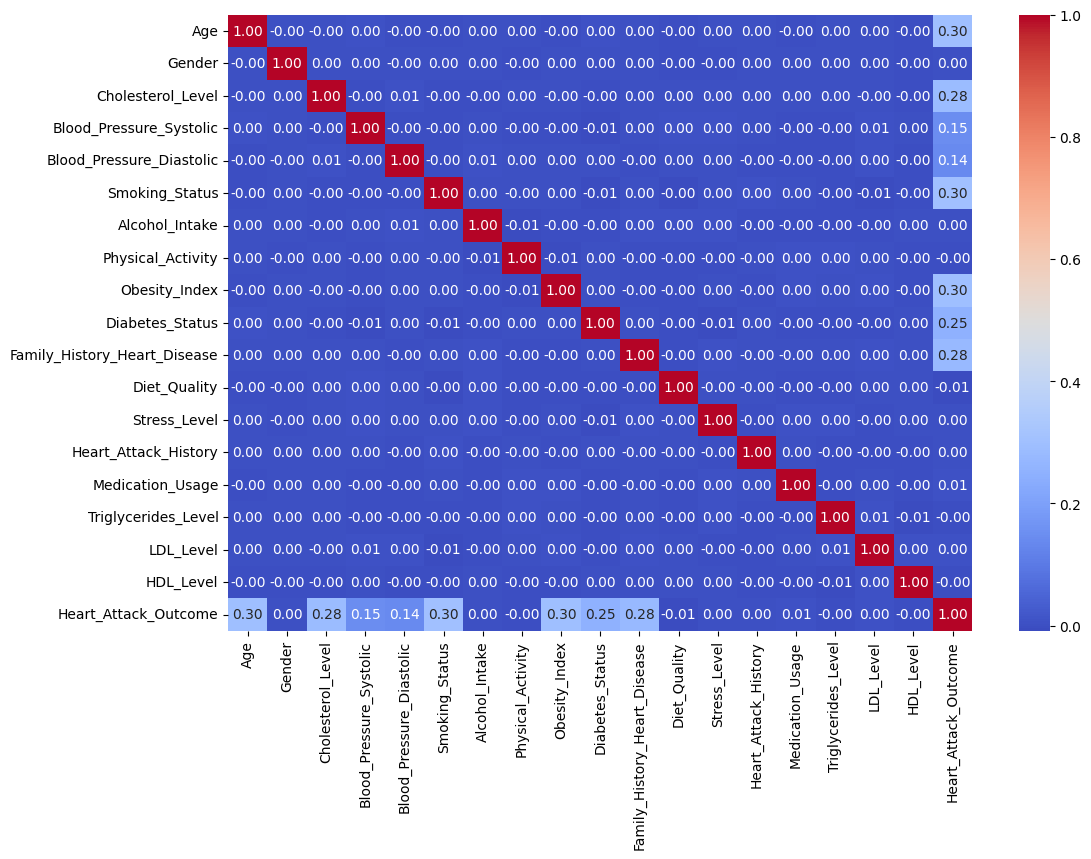

In [252]:
#matriz de correlação:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

Através do plot acima podemos ver que não temos multicolineariedade no nosso df. A seguir criar um metadados para ver o IV das variáveis:

In [254]:
metadados = pd.DataFrame(df.dtypes, columns=['dtype'])
metadados['valores_unicos'] = df.nunique()
metadados['papel'] = 'covariavel'
metadados.loc['Heart_Attack_Outcome','papel'] = 'resposta'
metadados

,dtype,valores_unicos,papel
Age,int64,65,covariavel
Gender,int64,2,covariavel
Cholesterol_Level,int64,150,covariavel
Blood_Pressure_Systolic,int64,110,covariavel
Blood_Pressure_Diastolic,int64,60,covariavel
Smoking_Status,int64,2,covariavel
Alcohol_Intake,int64,3,covariavel
Physical_Activity,int64,3,covariavel
Obesity_Index,float64,221,covariavel
Diabetes_Status,int64,2,covariavel


In [255]:
#função cálculo IV
def IV(variavel, resposta):
    tab = pd.crosstab(variavel, resposta, margins=True, margins_name='total')

    rótulo_evento = tab.columns[0]
    rótulo_nao_evento = tab.columns[1]

    tab['pct_evento'] = tab[rótulo_evento]/tab.loc['total',rótulo_evento]
    tab['ep'] = tab[rótulo_evento]/tab.loc['total',rótulo_evento]
    
    tab['pct_nao_evento'] = tab[rótulo_nao_evento]/tab.loc['total',rótulo_nao_evento]
    tab['woe'] = np.log(tab.pct_evento/tab.pct_nao_evento)
    tab['iv_parcial'] = (tab.pct_evento - tab.pct_nao_evento)*tab.woe
    return tab['iv_parcial'].sum()

In [256]:
#loop:
for var in metadados[metadados.papel=='covariavel'].index:
    if  (metadados.loc[var, 'valores_unicos']>6): #para mais que 6 valores unicos, usamos pd.qcut
        metadados.loc[var, 'IV'] = IV(pd.qcut(df[var],5,duplicates='drop'), df.Heart_Attack_Outcome)
    else: 
        metadados.loc[var, 'IV'] = IV(df[var], df.Heart_Attack_Outcome)

    
metadados

,dtype,valores_unicos,papel,IV
Age,int64,65,covariavel,0.462877
Gender,int64,2,covariavel,0.000005
Cholesterol_Level,int64,150,covariavel,0.511672
Blood_Pressure_Systolic,int64,110,covariavel,0.101007
Blood_Pressure_Diastolic,int64,60,covariavel,0.087411
Smoking_Status,int64,2,covariavel,0.417627
Alcohol_Intake,int64,3,covariavel,0.000037
Physical_Activity,int64,3,covariavel,0.000037
Obesity_Index,float64,221,covariavel,0.439663
Diabetes_Status,int64,2,covariavel,0.308958


*Geralmente, utiliza-se no modelo, as variáveis com IV maior que 2%*, seriam elas:

- Age;
- Cholesterol_Level;
- Blood_Pressure_Systolic;
- Blood_Pressure_Diastolic;
- Smoking_Status;
- Obesity_Index;
- Diabetes_Status;
- Family_History_Heart_Disease.

### Treino e Teste:

In [259]:
# Definir X (features) e y (target)
X = df.drop(columns=['Heart_Attack_Outcome'])  # Remove a variável alvo
y = df['Heart_Attack_Outcome']  # Define a variável alvo

# Separar em treino (80%) e teste (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Criar DataFrames completos de treino e teste
df_train = pd.concat([X_train, y_train], axis=1)
df_test = pd.concat([X_test, y_test], axis=1)

# Exibir tamanhos das amostras
print(f"Tamanho do df_train: {df_train.shape}")
print(f"Tamanho do df_test: {df_test.shape}")



Tamanho do df_train: (80000, 19)
Tamanho do df_test: (20000, 19)


### Equação de Regressão:

In [261]:
# ajuda para definir a equação da regressão
' + '.join(list(df.columns))

'Age + Gender + Cholesterol_Level + Blood_Pressure_Systolic + Blood_Pressure_Diastolic + Smoking_Status + Alcohol_Intake + Physical_Activity + Obesity_Index + Diabetes_Status + Family_History_Heart_Disease + Diet_Quality + Stress_Level + Heart_Attack_History + Medication_Usage + Triglycerides_Level + LDL_Level + HDL_Level + Heart_Attack_Outcome'

In [262]:
formula= '''
Heart_Attack_Outcome ~ Age + Gender + Cholesterol_Level + Blood_Pressure_Systolic + Blood_Pressure_Diastolic + Smoking_Status + Alcohol_Intake + Physical_Activity + Obesity_Index + Diabetes_Status + Family_History_Heart_Disease + Diet_Quality + Stress_Level + Heart_Attack_History + Medication_Usage + Triglycerides_Level + LDL_Level + HDL_Level
'''
r1 = smf.glm(formula, data=df_train, family=sm.families.Binomial()).fit()

r1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                  Generalized Linear Model Regression Results                   
================================================================================
Dep. Variable:     Heart_Attack_Outcome   No. Observations:                80000
Model:                              GLM   Df Residuals:                    79981
Model Family:                  Binomial   Df Model:                           18
Link Function:                    Logit   Scale:                          1.0000
Method:                            IRLS   Log-Likelihood:                -21677.
Date:                  Tue, 08 Apr 2025   Deviance:                       43354.
Time:                          20:28:28   Pearson chi2:                 5.38e+04
No. Iterations:                       7   Pseudo R-squ. (CS):             0.5568
Covariance Type:              nonrobust                                         
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                      -31.1586      0.258   -120.689      0.000     -31.665     -30.653
Age                              0.0900      0.001    101.856      0.000       0.088       0.092
Gender                          -0.0171      0.024     -0.703      0.482      -0.065       0.031
Cholesterol_Level                0.0375      0.000     99.947      0.000       0.037       0.038
Blood_Pressure_Systolic          0.0276      0.000     64.970      0.000       0.027       0.028
Blood_Pressure_Diastolic         0.0467      0.001     60.889      0.000       0.045       0.048
Smoking_Status                   3.8858      0.038    102.713      0.000       3.812       3.960
Alcohol_Intake                   0.0013      0.016      0.080      0.936      -0.031       0.033
Physical_Activity               -0.0056      0.016     -0.358      0.720      -0.036       0.025
Obesity_Index                    0.2670      0.003    102.010      0.000       0.262       0.272
Diabetes_Status                  3.8985      0.043     90.917      0.000       3.814       3.983
Family_History_Heart_Disease     3.8907      0.040     97.576      0.000       3.813       3.969
Diet_Quality                    -0.0212      0.017     -1.221      0.222      -0.055       0.013
Stress_Level                    -0.0088      0.017     -0.505      0.613      -0.043       0.025
Heart_Attack_History             0.0038      0.034      0.112      0.911      -0.063       0.070
Medication_Usage                 0.0374      0.024      1.538      0.124      -0.010       0.085
Triglycerides_Level             -0.0003      0.000     -1.681      0.093      -0.001    4.69e-05
LDL_Level                     3.278e-06      0.000      0.012      0.991      -0.001       0.001
HDL_Level                        0.0003      0.001      0.359      0.720      -0.001       0.002
================================================================================================
"""

Obtivemos aqui, que as variáveis estatisticamente significativas para o modelo são as mesmas já citadas anteriormente ao analisar o Information Value, são elas:

- Age;
- Cholesterol_Level;
- Blood_Pressure_Systolic;
- Blood_Pressure_Diastolic;
- Smoking_Status;
- Obesity_Index;
- Diabetes_Status;
- Family_History_Heart_Disease.

Portanto, criaremos o próximo modelo utilizando essas variáveis:

In [264]:
formula= '''
Heart_Attack_Outcome ~ Age + Cholesterol_Level + Blood_Pressure_Systolic + Blood_Pressure_Diastolic + Smoking_Status + Obesity_Index + Diabetes_Status + Family_History_Heart_Disease
'''
r2 = smf.glm(formula, data=df_train, family=sm.families.Binomial()).fit()

r2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                  Generalized Linear Model Regression Results                   
================================================================================
Dep. Variable:     Heart_Attack_Outcome   No. Observations:                80000
Model:                              GLM   Df Residuals:                    79991
Model Family:                  Binomial   Df Model:                            8
Link Function:                    Logit   Scale:                          1.0000
Method:                            IRLS   Log-Likelihood:                -21681.
Date:                  Tue, 08 Apr 2025   Deviance:                       43362.
Time:                          20:28:29   Pearson chi2:                 5.37e+04
No. Iterations:                       7   Pseudo R-squ. (CS):             0.5567
Covariance Type:              nonrobust                                         
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                      -31.2094      0.250   -124.981      0.000     -31.699     -30.720
Age                              0.0900      0.001    101.861      0.000       0.088       0.092
Cholesterol_Level                0.0375      0.000     99.963      0.000       0.037       0.038
Blood_Pressure_Systolic          0.0276      0.000     64.971      0.000       0.027       0.028
Blood_Pressure_Diastolic         0.0467      0.001     60.886      0.000       0.045       0.048
Smoking_Status                   3.8860      0.038    102.726      0.000       3.812       3.960
Obesity_Index                    0.2670      0.003    102.023      0.000       0.262       0.272
Diabetes_Status                  3.8974      0.043     90.919      0.000       3.813       3.981
Family_History_Heart_Disease     3.8903      0.040     97.587      0.000       3.812       3.968
================================================================================================
"""

A seguir, utilizaremos uma classificação em árvore com as variáveis acima para observarmos quais dessas variáveis ela traz como principais nós de decisão a fim de as utilizarmos com o objetivo de validar ou simplificar o nosso modelo.

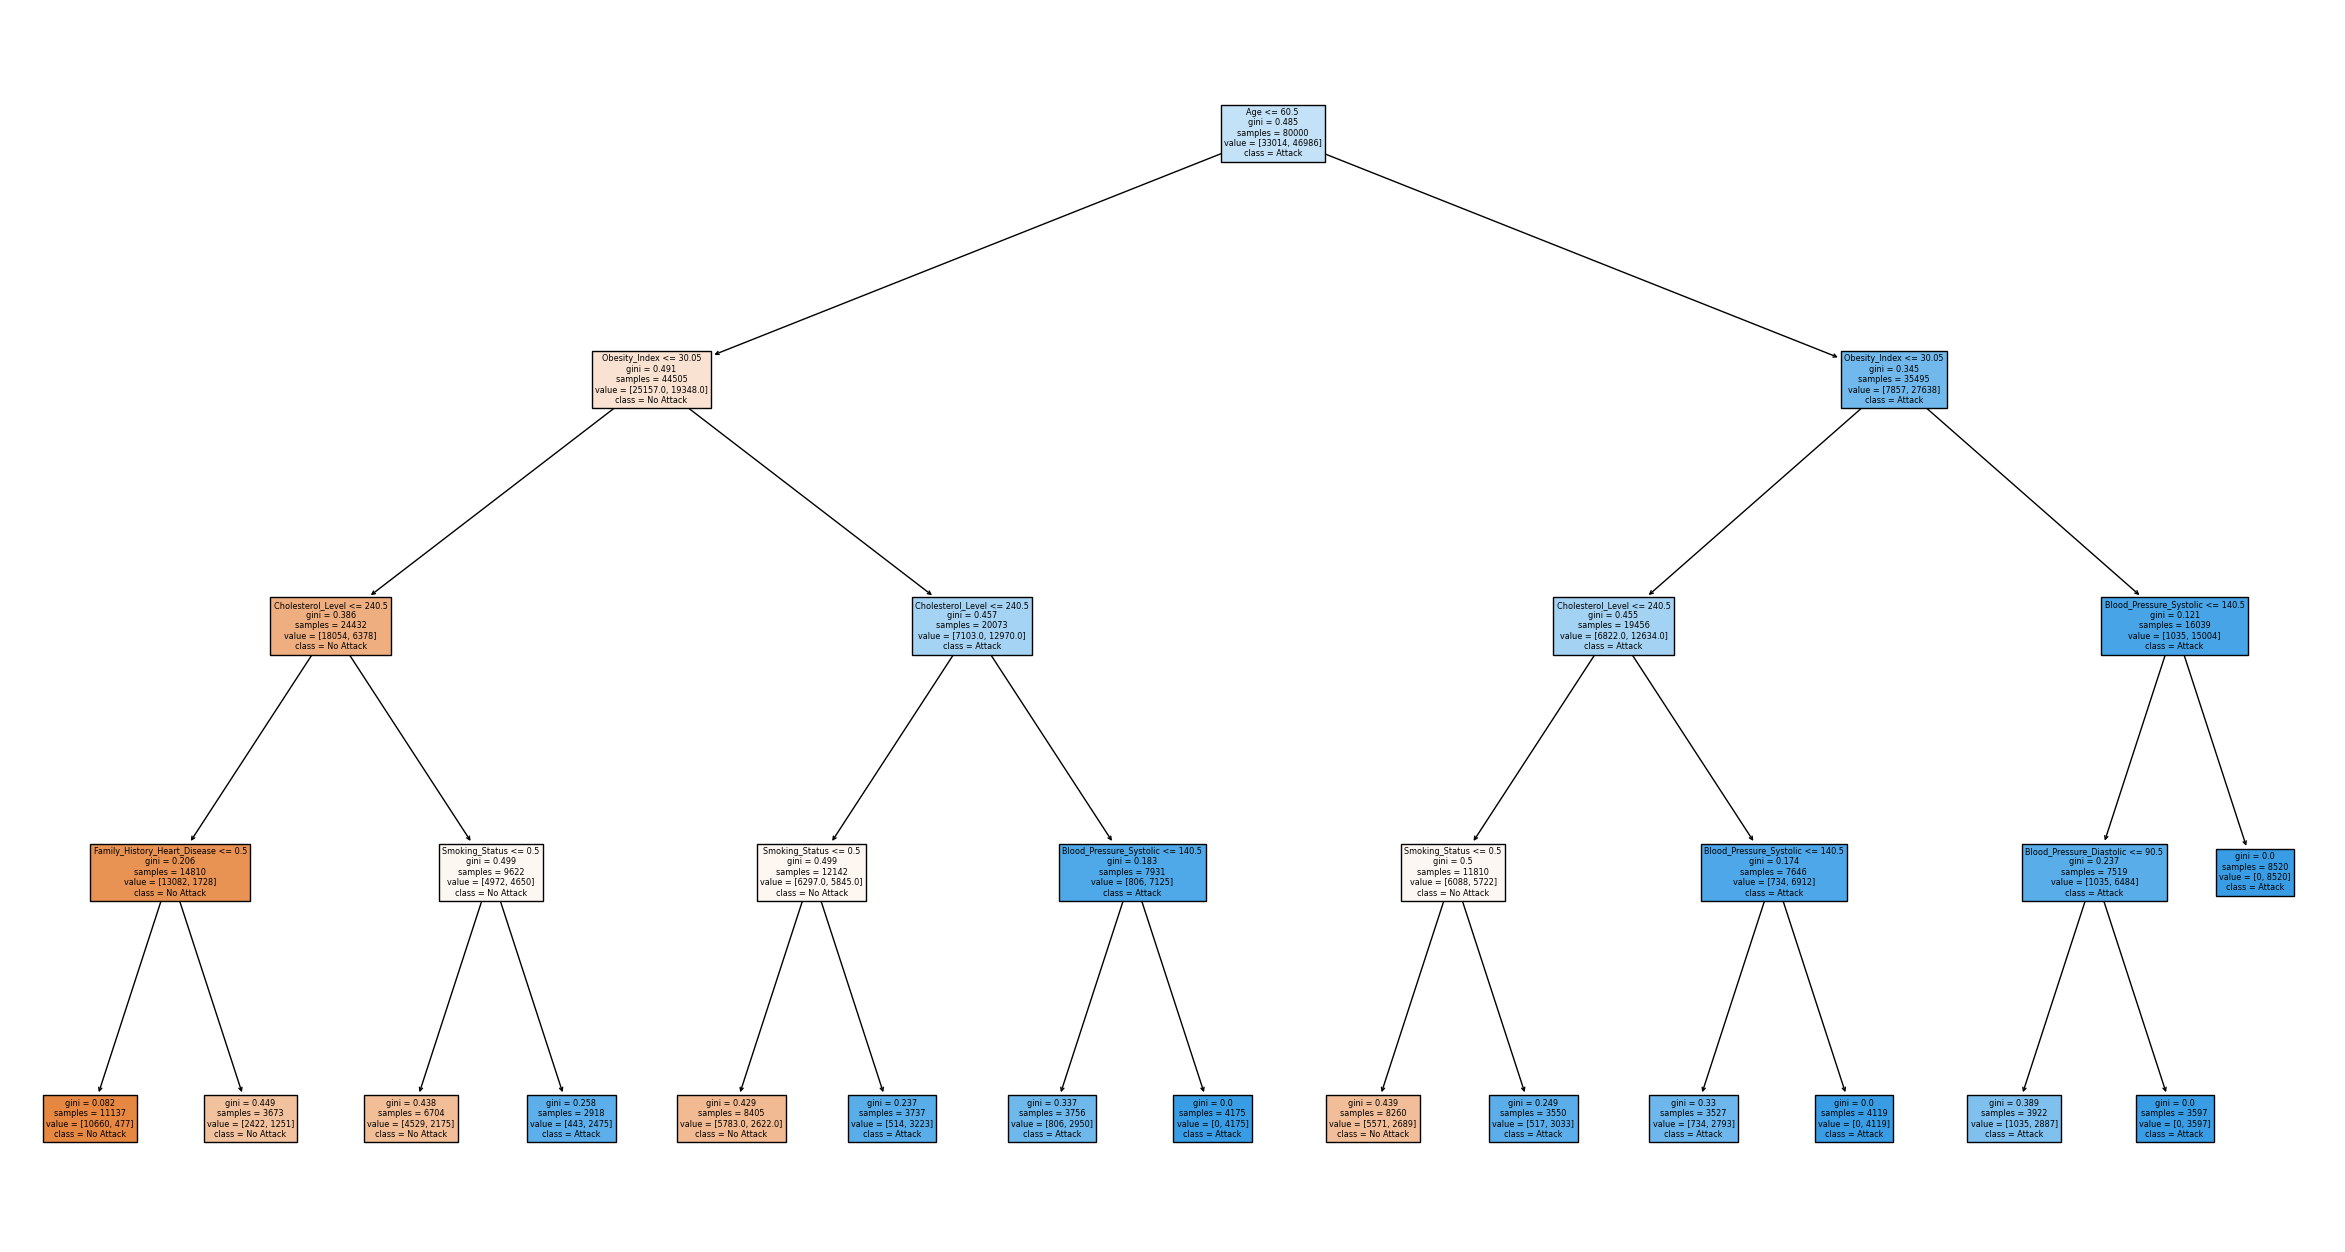

In [266]:
# Separando features e target
X_train = df_train[['Age', 'Cholesterol_Level', 'Blood_Pressure_Systolic', 'Blood_Pressure_Diastolic', 
                    'Smoking_Status', 'Obesity_Index', 'Diabetes_Status', 'Family_History_Heart_Disease']]
y_train = df_train['Heart_Attack_Outcome']

# Criando e treinando a árvore
tree_model = DecisionTreeClassifier(max_depth=4, random_state=42)  # Limitando profundidade para melhor interpretação
tree_model.fit(X_train, y_train)

# Visualizando a árvore
plt.figure(figsize=(30, 16))
plot_tree(tree_model, feature_names=X_train.columns, class_names=['No Attack', 'Attack'], filled=True)
plt.show()


Nas três primeiras camadas da nossa árvore a gente encontra Idade (nó raiz), Obesidade, Colesterol e Pressão Sistólica, respectivamente nessa ordem de importância. Vamos tentar um novo modelo de regressão com as 3 variáveis principais.

In [268]:
formula= '''
Heart_Attack_Outcome ~ Age + Cholesterol_Level + Obesity_Index
'''
r3 = smf.glm(formula, data=df_train, family=sm.families.Binomial()).fit()

r3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                  Generalized Linear Model Regression Results                   
================================================================================
Dep. Variable:     Heart_Attack_Outcome   No. Observations:                80000
Model:                              GLM   Df Residuals:                    79996
Model Family:                  Binomial   Df Model:                            3
Link Function:                    Logit   Scale:                          1.0000
Method:                            IRLS   Log-Likelihood:                -42466.
Date:                  Tue, 08 Apr 2025   Deviance:                       84932.
Time:                          20:28:31   Pearson chi2:                 7.79e+04
No. Iterations:                       5   Pseudo R-squ. (CS):             0.2547
Covariance Type:              nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -9.5448      0.079   -120.190      0.000      -9.700      -9.389
Age                   0.0426      0.000     88.166      0.000       0.042       0.044
Cholesterol_Level     0.0177      0.000     85.133      0.000       0.017       0.018
Obesity_Index         0.1251      0.001     87.801      0.000       0.122       0.128
=====================================================================================
"""

### Avaliando as métricas:

#### Modelo 1: Todas as variáveis:
**Treino:**

In [271]:
# Fazer previsões no conjunto de treino
df_train['score'] = r1.predict(df_train)

# Acurácia (usando threshold de 0.5 para classificação)
acc = metrics.accuracy_score(df_train.Heart_Attack_Outcome, df_train.score > 0.5)

# AUC
fpr, tpr, thresholds = metrics.roc_curve(df_train.Heart_Attack_Outcome, df_train.score)
auc = metrics.auc(fpr, tpr)

# Gini (2*AUC -1)
gini = 2 * auc - 1

# KS (Kolmogorov-Smirnov)
ks = ks_2samp(
    df_train.loc[df_train.Heart_Attack_Outcome == 1, 'score'],
    df_train.loc[df_train.Heart_Attack_Outcome == 0, 'score']
).statistic

# Exibir métricas
print('Acurácia (Treino): {0:.1%} \nAUC (Treino): {1:.1%} \nGINI (Treino): {2:.1%} \nKS (Treino): {3:.1%}'
      .format(acc, auc, gini, ks))

Acurácia (Treino): 87.4% 
AUC (Treino): 95.3% 
GINI (Treino): 90.6% 
KS (Treino): 74.8%


**Teste:**

In [273]:
# Obter as previsões no conjunto de teste
df_test.loc[:, 'score'] = r1.predict(df_test)

# Acurácia
acc_test = metrics.accuracy_score(df_test.Heart_Attack_Outcome, df_test.score > 0.5)

# AUC
fpr_test, tpr_test, thresholds_test = metrics.roc_curve(df_test.Heart_Attack_Outcome, df_test.score)
auc_test = metrics.auc(fpr_test, tpr_test)

# GINI
gini_test = 2 * auc_test - 1

# KS
ks_test = ks_2samp(
    df_test.loc[df_test.Heart_Attack_Outcome == 1, 'score'],
    df_test.loc[df_test.Heart_Attack_Outcome == 0, 'score']
).statistic

# Imprimir as métricas para o conjunto de teste
print('Acurácia (Teste): {0:.1%} \nAUC (Teste): {1:.1%} \nGINI (Teste): {2:.1%} \nKS (Teste): {3:.1%}'
      .format(acc_test, auc_test, gini_test, ks_test))

Acurácia (Teste): 87.7% 
AUC (Teste): 95.5% 
GINI (Teste): 91.1% 
KS (Teste): 75.4%


#### Modelo 2: Variáveis com IV (Information Value) > 2%
**Treino:**


In [275]:
# Fazer previsões no conjunto de treino
df_train['score'] = r2.predict(df_train)

# Acurácia (usando threshold de 0.5 para classificação)
acc = metrics.accuracy_score(df_train.Heart_Attack_Outcome, df_train.score > 0.5)

# AUC
fpr, tpr, thresholds = metrics.roc_curve(df_train.Heart_Attack_Outcome, df_train.score)
auc = metrics.auc(fpr, tpr)

# Gini (2*AUC -1)
gini = 2 * auc - 1

# KS (Kolmogorov-Smirnov)
ks = ks_2samp(
    df_train.loc[df_train.Heart_Attack_Outcome == 1, 'score'],
    df_train.loc[df_train.Heart_Attack_Outcome == 0, 'score']
).statistic

# Exibir métricas
print('Acurácia (Treino): {0:.1%} \nAUC (Treino): {1:.1%} \nGINI (Treino): {2:.1%} \nKS (Treino): {3:.1%}'
      .format(acc, auc, gini, ks))


Acurácia (Treino): 87.4% 
AUC (Treino): 95.3% 
GINI (Treino): 90.6% 
KS (Treino): 74.8%


**Teste:**

In [277]:
# Obter as previsões no conjunto de teste
df_test.loc[:, 'score'] = r2.predict(df_test)

# Acurácia
acc_test = metrics.accuracy_score(df_test.Heart_Attack_Outcome, df_test.score > 0.5)

# AUC
fpr_test, tpr_test, thresholds_test = metrics.roc_curve(df_test.Heart_Attack_Outcome, df_test.score)
auc_test = metrics.auc(fpr_test, tpr_test)

# GINI
gini_test = 2 * auc_test - 1

# KS
ks_test = ks_2samp(
    df_test.loc[df_test.Heart_Attack_Outcome == 1, 'score'],
    df_test.loc[df_test.Heart_Attack_Outcome == 0, 'score']
).statistic

# Imprimir as métricas para o conjunto de teste
print('Acurácia (Teste): {0:.1%} \nAUC (Teste): {1:.1%} \nGINI (Teste): {2:.1%} \nKS (Teste): {3:.1%}'
      .format(acc_test, auc_test, gini_test, ks_test))


Acurácia (Teste): 87.7% 
AUC (Teste): 95.5% 
GINI (Teste): 91.1% 
KS (Teste): 75.3%


#### Modelo 3: 3 maiores preditoras de acordo com a árvore de decisão:
**Treino:**

In [279]:
# Fazer previsões no conjunto de treino
df_train['score'] = r3.predict(df_train)

# Acurácia (usando threshold de 0.5 para classificação)
acc = metrics.accuracy_score(df_train.Heart_Attack_Outcome, df_train.score > 0.5)

# AUC
fpr, tpr, thresholds = metrics.roc_curve(df_train.Heart_Attack_Outcome, df_train.score)
auc = metrics.auc(fpr, tpr)

# Gini (2*AUC -1)
gini = 2 * auc - 1

# KS (Kolmogorov-Smirnov)
ks = ks_2samp(
    df_train.loc[df_train.Heart_Attack_Outcome == 1, 'score'],
    df_train.loc[df_train.Heart_Attack_Outcome == 0, 'score']
).statistic

# Exibir métricas
print('Acurácia (Treino): {0:.1%} \nAUC (Treino): {1:.1%} \nGINI (Treino): {2:.1%} \nKS (Treino): {3:.1%}'
      .format(acc, auc, gini, ks))

Acurácia (Treino): 72.5% 
AUC (Treino): 80.1% 
GINI (Treino): 60.1% 
KS (Treino): 44.8%


**Teste:**

In [281]:
# Obter as previsões no conjunto de teste
df_test.loc[:, 'score'] = r2.predict(df_test)

# Acurácia
acc_test = metrics.accuracy_score(df_test.Heart_Attack_Outcome, df_test.score > 0.5)

# AUC
fpr_test, tpr_test, thresholds_test = metrics.roc_curve(df_test.Heart_Attack_Outcome, df_test.score)
auc_test = metrics.auc(fpr_test, tpr_test)

# GINI
gini_test = 2 * auc_test - 1

# KS
ks_test = ks_2samp(
    df_test.loc[df_test.Heart_Attack_Outcome == 1, 'score'],
    df_test.loc[df_test.Heart_Attack_Outcome == 0, 'score']
).statistic

# Imprimir as métricas para o conjunto de teste
print('Acurácia (Teste): {0:.1%} \nAUC (Teste): {1:.1%} \nGINI (Teste): {2:.1%} \nKS (Teste): {3:.1%}'
      .format(acc_test, auc_test, gini_test, ks_test))

Acurácia (Teste): 87.7% 
AUC (Teste): 95.5% 
GINI (Teste): 91.1% 
KS (Teste): 75.3%


### Conclusão:

| Métrica              | Modelo 1 (18 variáveis) | Modelo 2 (8 variáveis) | Modelo 3 (3 variáveis) |
|----------------------|--------------------------|--------------------------|--------------------------|
| **Acurácia (Treino)**| 87.4%                   | 87.4%                   | 72.5%                   |
| **AUC (Treino)**     | 95.3%                   | 95.3%                   | 80.1%                   |
| **GINI (Treino)**    | 90.6%                   | 90.6%                   | 60.1%                   |
| **KS (Treino)**      | 74.8%                   | 74.8%                   | 44.8%                   |
|----------------------|--------------------------|--------------------------|--------------------------|
| **Acurácia (Teste)** | 87.7%                   | 87.7%                   | 87.7%                   |
| **AUC (Teste)**      | 95.5%                   | 95.5%                   | 95.5%                   |
| **GINI (Teste)**     | 91.1%                   | 91.1%                   | 91.1%                   |
| **KS (Teste)**       | 75.4%                   | 75.3%                   | 75.3%                   |


**Modelo 1:**
- 18 variáveis;
- Alto desempenho em todas as métricas;
- Difícil interpretar por conta do alto número de variáveis;

**Modelo 2:**
- 8 variáveis;
- Alto desempenho em todas as métricas;
- Mais simples e interpretável que o modelo 1 e mantém a mesma performance.

**Modelo 3:**
- 3 variáveis;
- Queda brusca no treino em relação aos modelos anteriores;
- Perforrmance estranhamente boa para teste visto que esse desempenho é muito menor para treino;
- Arriscado para um problema sério como ataque cardiáco.

A nossa escolha final será o Modelo 2, uma vez que é interpretável, simples e tem uma boa performance com alta acurácia, excelente capacidade preditiva (AUC e GINI elevados) e boa separação das classes (KS alto).